<a href="https://colab.research.google.com/github/prabhudc/colab-dump/blob/master/covid_19_stream_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import colors

## Download data
We use the dataset maintained by the John Hopkins University. These datasets along with other data can be found at : https://github.com/CSSEGISandData/COVID-19

The dataset is refreshed once a day.

In [0]:
# Download JHU consolidated time-series
df_cov19_jhu_raw_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_cov19_jhu_raw_confirmed = df_cov19_jhu_raw_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"],var_name="Date",value_name="Value") # Pivoted date values
df_cov19_jhu_raw_confirmed.loc[:,"Date"] = pd.to_datetime(df_cov19_jhu_raw_confirmed.loc[:,"Date"]) # Date formatted
df_cov19_jhu_raw_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_cov19_jhu_raw_deaths = df_cov19_jhu_raw_deaths.melt(id_vars=["Province/State", "Country/Region","Lat","Long"],var_name="Date",value_name="Value") # Pivoted date values
df_cov19_jhu_raw_deaths.loc[:,"Date"] = pd.to_datetime(df_cov19_jhu_raw_deaths.loc[:,"Date"]) # Date formatted
df_cov19_jhu_raw_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_cov19_jhu_raw_recovered = df_cov19_jhu_raw_recovered.melt(id_vars=["Province/State", "Country/Region","Lat","Long"],var_name="Date",value_name="Value") # Pivoted date values
df_cov19_jhu_raw_recovered.loc[:,"Date"] = pd.to_datetime(df_cov19_jhu_raw_recovered.loc[:,"Date"]) # Date formatted



## Pre-process


The JHU dataset has values recorded at the level of provinces for some countries. For ease of visualization, we roll the data up to country level

In [0]:
# Cumulate the counts across provinces within a country
df_cov19_jhu_select_confirmed = df_cov19_jhu_raw_confirmed.loc[:,["Country/Region","Date","Value"]]
df_cov19_jhu_grouped_confirmed = df_cov19_jhu_select_confirmed.groupby(by = ["Country/Region","Date"]).sum().reset_index()
df_cov19_jhu_grouped_confirmed.columns = ["country","date","count"]

df_cov19_jhu_select_deaths = df_cov19_jhu_raw_deaths.loc[:,["Country/Region","Date","Value"]]
df_cov19_jhu_grouped_deaths = df_cov19_jhu_select_deaths.groupby(by = ["Country/Region","Date"]).sum().reset_index()
df_cov19_jhu_grouped_deaths.columns = ["country","date","count"]

df_cov19_jhu_select_recovered = df_cov19_jhu_raw_recovered.loc[:,["Country/Region","Date","Value"]]
df_cov19_jhu_grouped_recovered = df_cov19_jhu_select_recovered.groupby(by = ["Country/Region","Date"]).sum().reset_index()
df_cov19_jhu_grouped_recovered.columns = ["country","date","count"]

## Ploting

Visualize confirmed cases across all countries

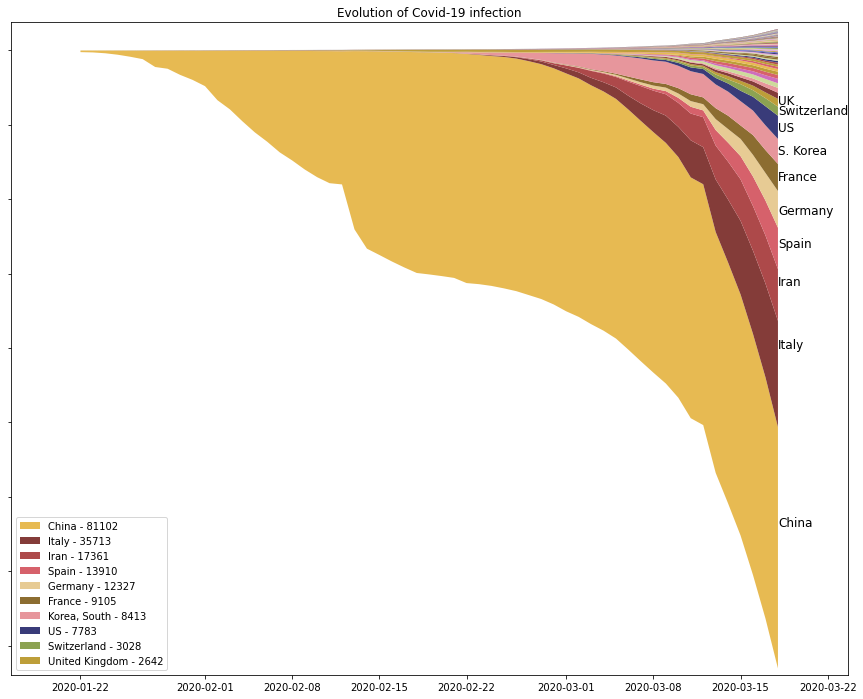

In [10]:
df_cov19_jhu_pivot_confirmed = df_cov19_jhu_grouped_confirmed.pivot(index= "country",columns = "date", values="count").reset_index()
# Sort em up
df_cov19_jhu_pivot_confirmed = df_cov19_jhu_pivot_confirmed.sort_values(by=df_cov19_jhu_pivot_confirmed.columns[-1],ascending=False) 

#Setup the colors for further processing
country_list = df_cov19_jhu_raw_confirmed["Country/Region"].unique()
cmap = plt.get_cmap("tab20b",len(country_list))
color_list_confirmed = [colors.rgb2hex(rgb) for rgb in cmap(np.arange(0,len(country_list)))]
random.shuffle(color_list_confirmed)

# Set the color map to be referenced in later charts
df_color_map = pd.DataFrame()
df_color_map["country"] = df_cov19_jhu_pivot_confirmed.iloc[:,0]
df_color_map["color"] = color_list_confirmed

# Fill the plot input values
y = np.array(df_cov19_jhu_pivot_confirmed.iloc[:,1:])
x = df_cov19_jhu_pivot_confirmed.columns[1:]
country_labels = df_cov19_jhu_pivot_confirmed.iloc[:,0]
# So as to not clutter the chart, we only display  the top 10 countries
top_10_countries = df_cov19_jhu_pivot_confirmed.iloc[0:10,0] + [' - ' + str(elem )for elem in list(df_cov19_jhu_pivot_confirmed.iloc[0:10,-1])]

# Plot the chart
fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_confirmed,labels=top_10_countries)
ax.legend(loc='lower left')
ax.set_yticklabels("")
ax.set_title("Evolution of Covid-19 infection")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -160000, 'China',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -100000, 'Italy',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -79000, 'Iran',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -66000, 'Spain',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -55000, 'Germany',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -43500, 'France',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -35000, 'S. Korea',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -27000, 'US',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -21500, 'Switzerland',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -18000, 'UK',size="12")
ymin, ymax = ax.get_ylim()
ax.label_outer()
plt.margins(0.1,.01)

plt.show()

The recovery rate of patients have not managed to catch-up with the explosion of infected cases. We see this in the next chart displayed along the same scale the chart depicting the infection

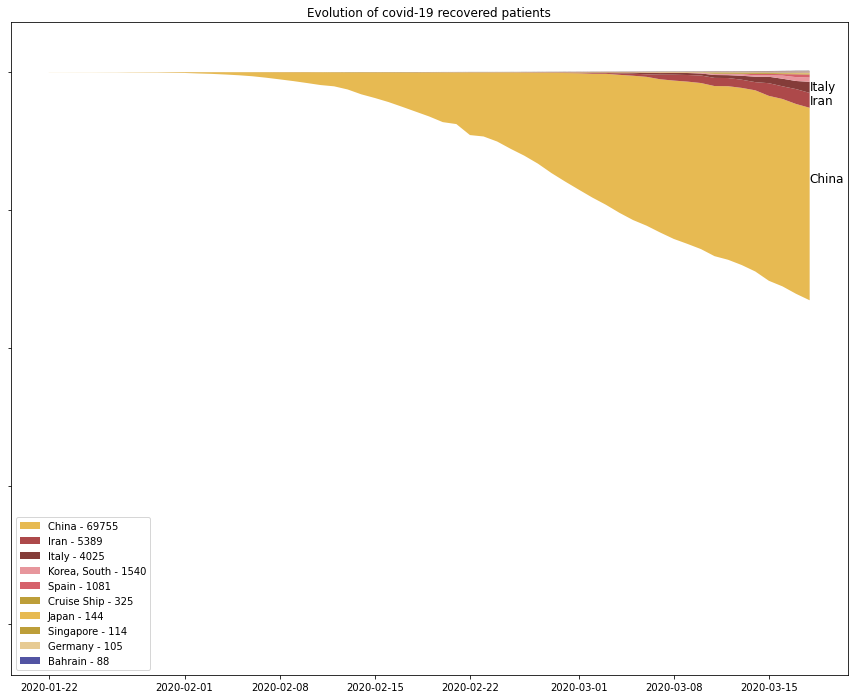

In [11]:
df_cov19_jhu_pivot_recovered = df_cov19_jhu_grouped_recovered.pivot(index= "country",columns = "date", values="count").reset_index()
# Sort em up
df_cov19_jhu_pivot_recovered = df_cov19_jhu_pivot_recovered.sort_values(by=df_cov19_jhu_pivot_recovered.columns[-1],ascending=False) 

# Fill the polot specific
y = np.array(df_cov19_jhu_pivot_recovered.iloc[:,1:])
x = df_cov19_jhu_pivot_recovered.columns[1:]
country_labels = df_cov19_jhu_pivot_recovered.iloc[:,0]
# So as to not clutter the chart, we only display  the top 10 countries
top_10_countries = df_cov19_jhu_pivot_recovered.iloc[0:10,0] + [' - ' + str(elem )for elem in list(df_cov19_jhu_pivot_recovered.iloc[0:10,-1])]

# Look up the colors defined in the confirmed list
df_recovered_color = pd.DataFrame(df_cov19_jhu_pivot_recovered.iloc[:,0])
df_recovered_color = df_recovered_color.merge(df_color_map, on="country")
color_list_recovered = df_recovered_color.loc[:,"color"]

# Plot the chart
fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_recovered,labels=top_10_countries)
ax.legend(loc='lower left')
ax.set_yticklabels("")
ax.set_ylim(ymin, ymax)
ax.text(df_cov19_jhu_pivot_recovered.columns[-1], -40000, 'China',size="12")
ax.text(df_cov19_jhu_pivot_recovered.columns[-1], -11500, 'Iran',size="12")
ax.text(df_cov19_jhu_pivot_recovered.columns[-1], -6500, 'Italy',size="12")
ax.set_title("Evolution of covid-19 recovered patients")
plt.show()

Although, in no way to meant to undermine the people losing their lives due to this pandemic, we see that the death rate is quite low. May their loved ones find peace!

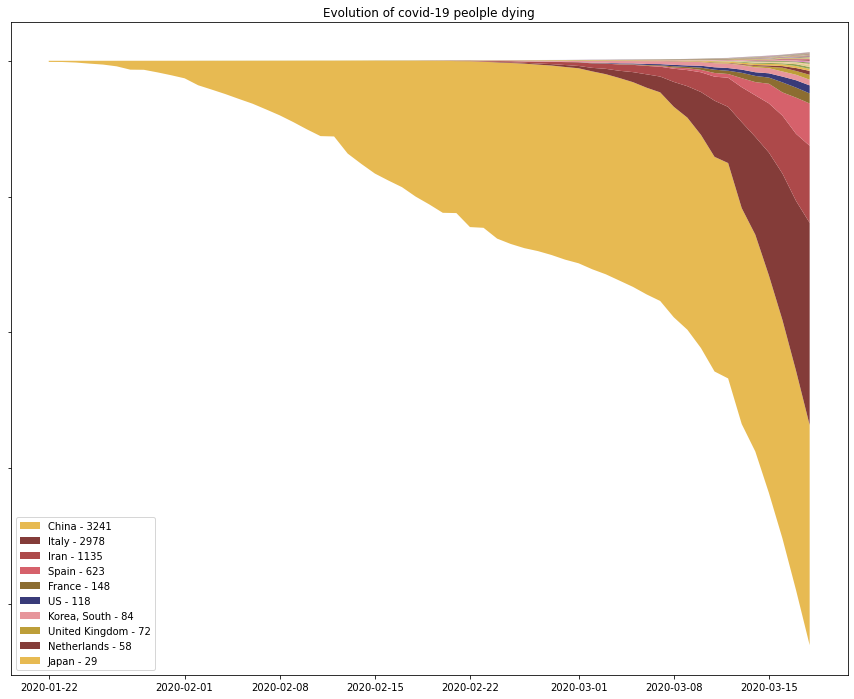

In [15]:
df_cov19_jhu_pivot_deaths = df_cov19_jhu_grouped_deaths.pivot(index= "country",columns = "date", values="count").reset_index()
# Sort em up
df_cov19_jhu_pivot_deaths = df_cov19_jhu_pivot_deaths.sort_values(by=df_cov19_jhu_pivot_deaths.columns[-1],ascending=False) 

# Fill the plot specific fields
y = np.array(df_cov19_jhu_pivot_deaths.iloc[:,1:])
x = df_cov19_jhu_pivot_deaths.columns[1:]
country_labels = df_cov19_jhu_pivot_deaths.iloc[:,0]
# So as to not clutter the chart, we only display  the top 10 countries
top_10_countries = df_cov19_jhu_pivot_deaths.iloc[0:10,0] + [' - ' + str(elem )for elem in list(df_cov19_jhu_pivot_deaths.iloc[0:10,-1])]

# Look up the colors defined in the confirmed list
df_death_color = pd.DataFrame(df_cov19_jhu_pivot_deaths.iloc[:,0])
df_death_color = df_death_color.merge(df_color_map, on="country")
color_list_death = df_death_color.loc[:,"color"]

# Plot the chart
fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_death,labels=top_10_countries)
ax.legend(loc='lower left')
ax.set_yticklabels("")
# ax.set_ylim(ymin, ymax)
# ax.text(df_cov19_jhu_pivot_deaths.columns[-1], -40000, 'China',size="12")
# ax.text(df_cov19_jhu_pivot_deaths.columns[-1], -11500, 'Iran',size="12")
# ax.text(df_cov19_jhu_pivot_deaths.columns[-1], -6500, 'Italy',size="12")
ax.set_title("Evolution of covid-19 peolple dying")
plt.show()

As China has seen significant improvement, other countries, especially European nations now become the new epicenter. 

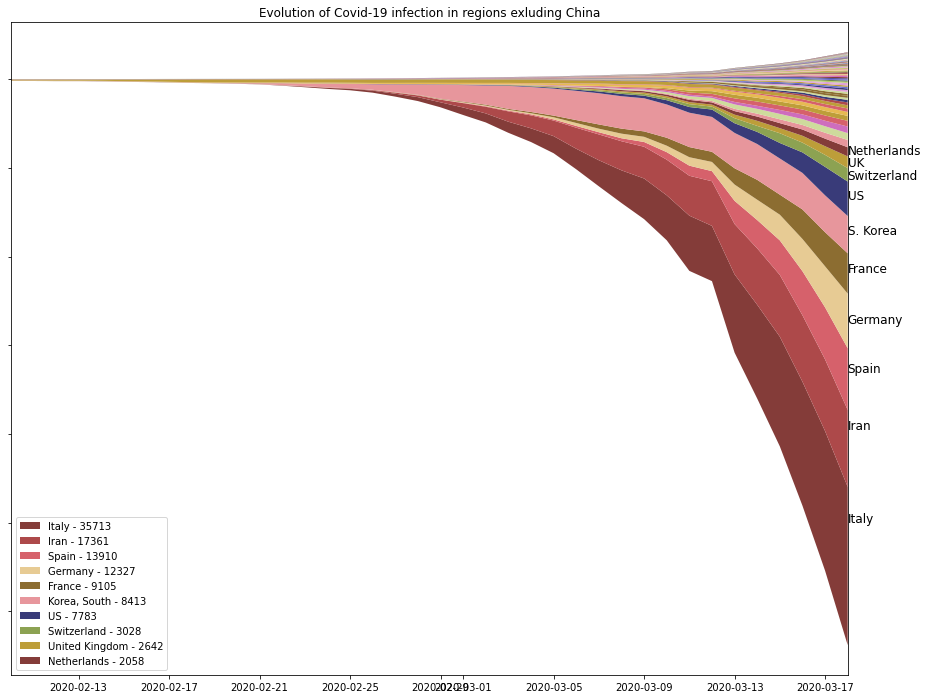

In [12]:

df_cov19_jhu_pivot_confirmed = df_cov19_jhu_grouped_confirmed.pivot(index= "country",columns = "date", values="count").reset_index()
df_nonchina_confirmed = df_cov19_jhu_pivot_confirmed[df_cov19_jhu_pivot_confirmed.loc[:,"country"] != "China"]
# Sort em up
df_nonchina_confirmed = df_nonchina_confirmed.sort_values(by=df_nonchina_confirmed.columns[-1],ascending=False) 

y = np.array(df_nonchina_confirmed.iloc[:,1:])
x = df_nonchina_confirmed.columns[1:]
country_labels = df_nonchina_confirmed.iloc[:,0]

# So as to not clutter the chart, we only display  the top 10 countries
# top_10_countries = df_nonchina_confirmed.iloc[0:10,].loc[:,"country"]
top_10_countries = df_nonchina_confirmed.iloc[0:10,0] + [' - ' + str(elem)for elem in list(df_nonchina_confirmed.iloc[0:10,-1])]

# Look up the colors defined in the confirmed list
df_nonchina_color = pd.DataFrame(df_nonchina_confirmed.iloc[:,0])
df_nonchina_color = df_nonchina_color.merge(df_color_map, on="country")
color_list_nonchina = df_nonchina_color.loc[:,"color"]

fig, ax = plt.subplots(figsize=(15,12))
ax.stackplot(x,y,baseline='wiggle',colors=color_list_nonchina,labels=top_10_countries)
ax.set_xlim('2020-02-10', '2020-03-18')
ax.legend(loc='lower left')
ax.set_yticklabels("")
ax.set_title("Evolution of Covid-19 infection in regions exluding China")
# ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -160000, 'Italy',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -100000, 'Italy',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -79000, 'Iran',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -66000, 'Spain',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -55000, 'Germany',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -43500, 'France',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -35000, 'S. Korea',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -27000, 'US',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -22500, 'Switzerland',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -19500, 'UK',size="12")
ax.text(df_cov19_jhu_pivot_confirmed.columns[-1], -17000, 'Netherlands',size="12")
plt.show()